# Feature Engineering: Creation and Transformations

### Read in text

In [1]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create the two new features

In [2]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_length'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_length,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


### Plot the two new features

In [3]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

C:\Users\deeks\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


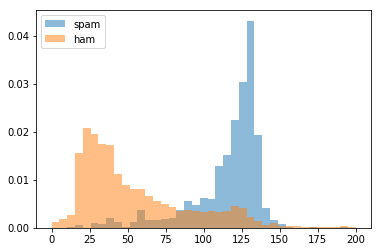

In [4]:
bins = np.linspace(0,200,40)
pyplot.hist(data[data['label']=='spam']['body_length'] , bins , alpha = 0.5 , normed = True ,label = 'spam' )
pyplot.hist(data[data['label']=='ham']['body_length'],bins ,alpha =0.5,normed =True, label = 'ham')
pyplot.legend(loc = 'upper left')
pyplot.show()

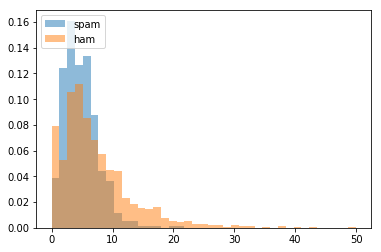

In [5]:
bins = np.linspace(0,50,40)
pyplot.hist(data[data['label']=='spam']['punct%'] , bins , alpha = 0.5 , normed = True ,label = 'spam' )
pyplot.hist(data[data['label']=='ham']['punct%'],bins ,alpha =0.5,normed =True, label = 'ham')
pyplot.legend(loc = 'upper left')
pyplot.show()

In [ ]:
# In order to determine whether a transformation might be helpful, we can look at the distributionof our data using a histogram.
# Previously in pyplt we used normalized overlayed histogram, but we didn't look at the full histogram.So we are still not sure of what the full distribution looks like for these new features.
# We only know whe it's split by label.
# 1st we'll look at full distribution and then decide which one is fit for a transformation.
#

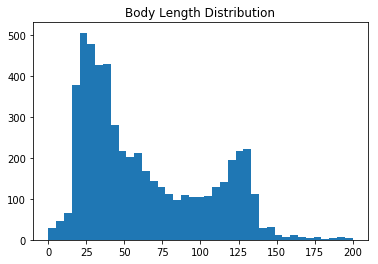

In [7]:
bins = np.linspace(0,200,40)

pyplot.hist(data['body_length'],bins)
pyplot.title("Body Length Distribution")
pyplot.show()

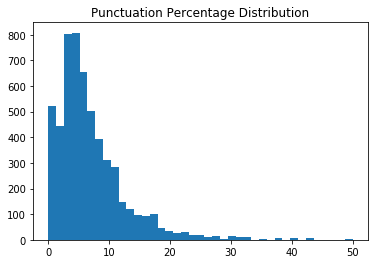

In [8]:
bins = np.linspace(0,50,40)

pyplot.hist(data['punct%'],bins)
pyplot.title("Punctuation Percentage Distribution")
pyplot.show()

### Transform the punctuation % feature

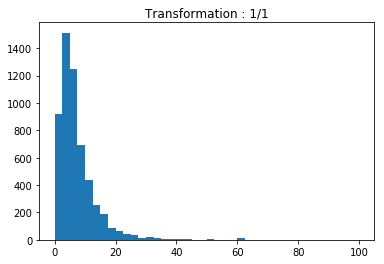

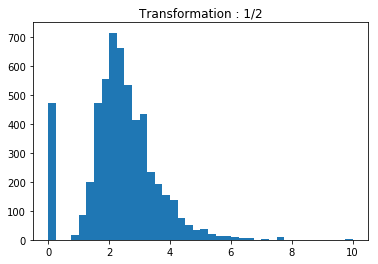

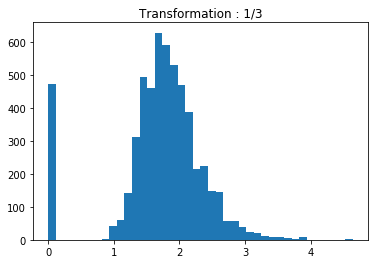

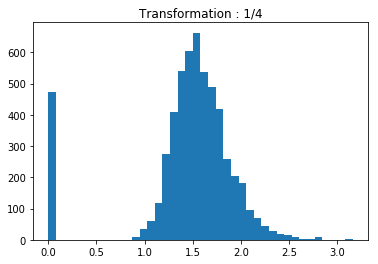

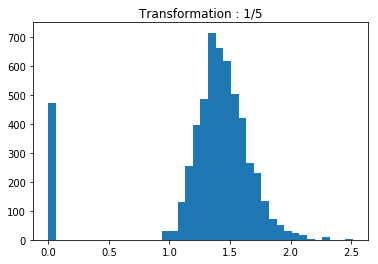

In [11]:
for i in [1,2,3,4,5]:
    pyplot.hist((data['punct%'])**(1/i),bins = 40)
    pyplot.title("Transformation : 1/{}".format(str(i)))
    pyplot.show()